In [1]:
import os

# move to project root
while True:
    # get list of directories
    dirs = os.listdir()
    if "README.md" in dirs:
        break
    else:
        os.chdir("..")

# then move to feature extraction
os.chdir("feature_extraction")

print(os.getcwd())

/mnt/antares_raid/home/bramantyos/codes/timescales_filtering/feature_extraction


In [2]:
from utils import load_generic_trfiles, load_grids_for_stories, load_story_info
from features import Features

import numpy as np

Using gpu


In [3]:
en_grid_dir = "../data/deniz2019/en/sentence_TextGrids"
en_tr_dir = "../data/deniz2019/en/trfiles"

zh_grid_dir = "../data/bling/grids_w_punctuation/zh"
zh_tr_dir = "../data/bling/TYE/trfiles/zh"

In [4]:
train_stories = [
    "alternateithicatom",
    "avatar",
    "howtodraw",
    "legacy",
    "life",
    "myfirstdaywiththeyankees",
    "naked",
    "odetostepfather",
    "souls",
    "undertheinfluence",
]
test_stories = ["wheretheressmoke"]

train_stories_zh = [
    "alternateithacatomAudio_zh",
    "avatarAudio_zh",
    "howtodrawAudio_zh",
    "legacyAudio_zh",
    "lifeAudio_zh",
    "myfirstdaywiththeyankeesAudio_zh",
    "nakedAudio_zh",
    "odetostepfatherAudio_zh",
    "soulsAudio_zh",
    "undertheinfluenceAudio_zh",
]

test_stories_zh = ["wheretheressmokeAudio_zh"]

In [5]:
# en
en_stories = train_stories + test_stories
grids = load_grids_for_stories(en_stories, grid_dir=en_grid_dir)
trfiles = load_generic_trfiles(en_stories, root=en_tr_dir)
features_object = Features(grids, trfiles)

# zh
grids_zh = load_grids_for_stories(en_stories, grid_dir=zh_grid_dir)
trfiles_zh = load_generic_trfiles(en_stories, root=zh_tr_dir)
features_object_zh = Features(grids_zh, trfiles_zh)

load_grids_for_stories ['alternateithicatom', 'avatar', 'howtodraw', 'legacy', 'life', 'myfirstdaywiththeyankees', 'naked', 'odetostepfather', 'souls', 'undertheinfluence', 'wheretheressmoke'] ../data/deniz2019/en/sentence_TextGrids
load_grids_for_stories ['alternateithicatom', 'avatar', 'howtodraw', 'legacy', 'life', 'myfirstdaywiththeyankees', 'naked', 'odetostepfather', 'souls', 'undertheinfluence', 'wheretheressmoke'] ../data/bling/grids_w_punctuation/zh


In [6]:
features_object

In [7]:
n_word_en = []
for s in en_stories:
    datasequence = features_object.wordseqs[s]
    n_word = len(datasequence.data)
    min_time = datasequence.data_times.min()
    max_time = datasequence.data_times.max()  
    
    wpm = n_word * 60/ (max_time - min_time)
    n_word_en.append(
        {
            'story': s,
            'n_words': n_word,
            'min_time': min_time,
            'max_time': max_time,
            'wpm': wpm   
        }
    )

In [8]:
n_word_zh = []
for s in en_stories:
    datasequence = features_object_zh.wordseqs[s]
    n_word = len(datasequence.data)
    min_time = datasequence.data_times.min()
    max_time = datasequence.data_times.max()  
    
    wpm = n_word * 60/ (max_time - min_time)
    n_word_zh.append(
        {
            'story': s,
            'n_words': n_word,
            'min_time': min_time,
            'max_time': max_time,
            'wpm': wpm   
        }
    )

In [9]:
# to csv 
import pandas as pd

df_en = pd.DataFrame(n_word_en)
df_zh = pd.DataFrame(n_word_zh)

df_en.to_csv('outputs/n_words_en.csv', index=False)
df_zh.to_csv('outputs/n_words_zh.csv', index=False)

In [10]:
df_en.set_index('story', inplace=True)

In [11]:
df_zh.set_index('story', inplace=True)

In [12]:
# bar plot of wpm for these stories
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# joined 
df_en['lang'] = 'en'
df_zh['lang'] = 'zh'

df = pd.concat([df_en, df_zh])

# rename "myfirstdaywiththeyankees" to yankees
df.rename(index={'myfirstdaywiththeyankees': 'yankees'}, inplace=True)


In [14]:
sns.set_style("darkgrid")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'alternateithicatom'),
  Text(1, 0, 'avatar'),
  Text(2, 0, 'howtodraw'),
  Text(3, 0, 'legacy'),
  Text(4, 0, 'life'),
  Text(5, 0, 'yankees'),
  Text(6, 0, 'naked'),
  Text(7, 0, 'odetostepfather'),
  Text(8, 0, 'souls'),
  Text(9, 0, 'undertheinfluence'),
  Text(10, 0, 'wheretheressmoke')])

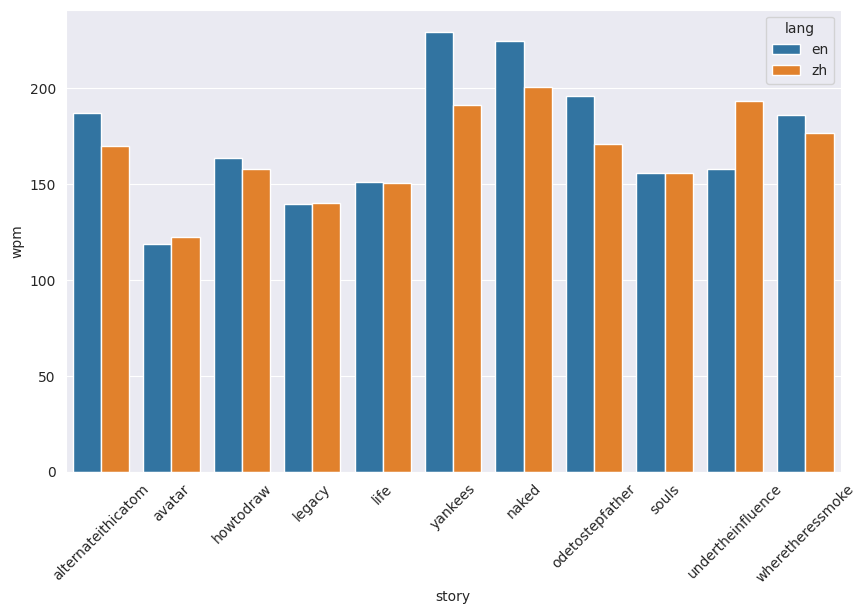

In [15]:

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='story', y='wpm', hue='lang', data=df, ax=ax)

# set ticks to be tilted
plt.xticks(rotation=45)

In [81]:
(df[df['lang'] == 'en']['wpm'] - df[df['lang'] == 'zh']['wpm']).mean()

7.391569776321415

In [16]:
df[df['lang'] == 'en']['wpm'].mean()

173.68233191503504

In [17]:
df[df['lang'] == 'zh']['wpm'].mean()

166.2907621387136